In [1]:
%matplotlib notebook

Wrong input parameters. The default values will be assigned


<IPython.core.display.Javascript object>


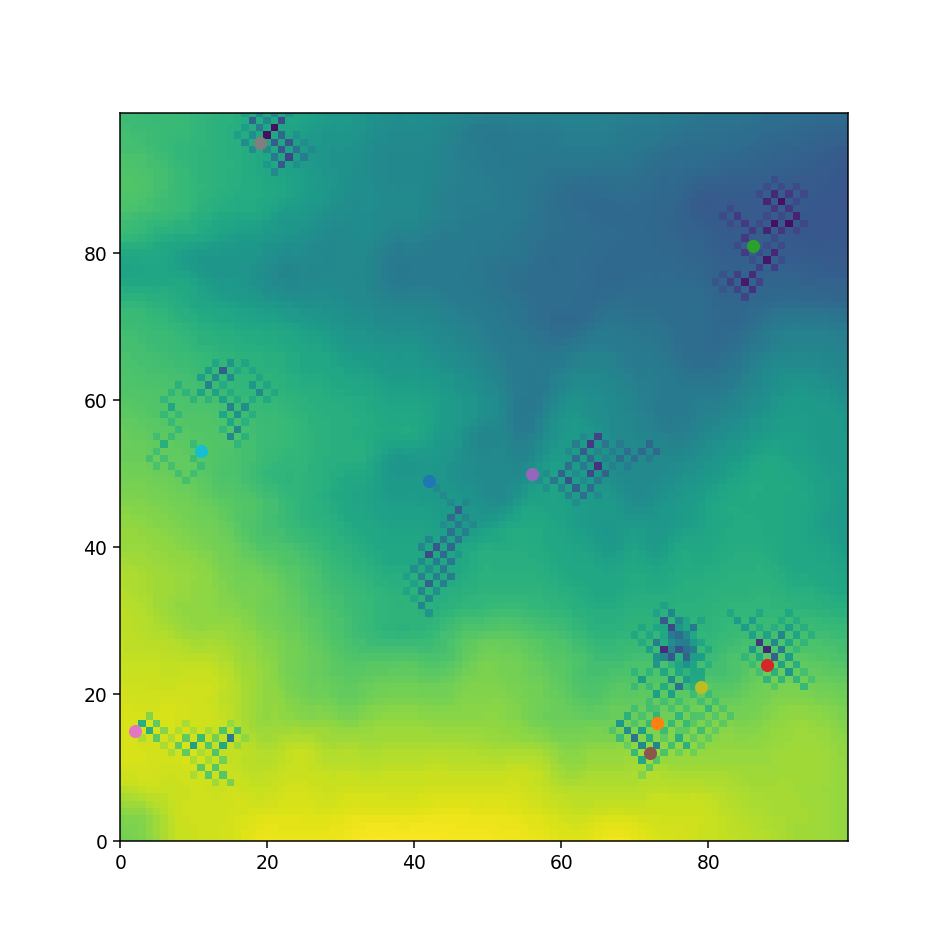

In [5]:
# -*- coding: utf-8 -*-
"""
Date Last Updated: 
    Mar 31, 2019

Author: 
    Orkhan Hajiyev (gy17oh)

Title: 
    Assignment 1. Module GEOG5991M
    Agent-based modelling (ABM)

Version: 
    FINAL

Purpose: 
    To implement the requirements of the Assignment 1 of the Module GEOG5991M.
    Online portfolio of the practical work was created in GitHub environment.
    
License: 
    Copyright (c) 2019 Orkhan Hajiyev
    Lisence under MIT License
    License link: 
        https://github.com/ohajiyev/Assignment1/blob/master/LICENSE.md
       
Github Repo Link: 
    https://github.com/ohajiyev/Assignment1
    
Code Folder Link:
    https://github.com/ohajiyev/Assignment1/tree/master/python/src/unpackaged/
    abm/FINAL

Instructions to run:
    The FINAL folder contains the following files:
        'model.py' - main code to run from command prompt
        'agentframework.py' - Agent class definiton
        'in.txt' - input file
        'model_notebook.ipynb' - Jupyter Notebook file

    Software requirements:
        Anaconda3 (64bit):
            Python 3.7
            Spyder 3.3.2
            Jupiter Notebook
            Anaconda prompt
        
    The code can be run in Anaconda command line, Spyder and Jupyter notebook.
        Anaconda cmd: 
            1. 1st option. Run 'python model.py' in the command line without 
               any parameters. Defaults will be used: agents number = 10; 
               number of iteration = 100; neighbourhood = 30
               
               2nd Option. Run 'python model.py 10 100 20' in the command line 
               with integer parameters. In a case if input is wrong defaults 
               will be used: agents number = 10; number of iteration = 100; 
               neighbourhood = 30
        Spyder: 
            1. Open 'model.py'
            2. Ensure that IPython console is activated
            3. Run '#%matplotlib qt5' command in IPython console to interact
               with interface.
            4. Press 'F5' button or 'Run' from the  menu to run the code
        Jupyter Notebook:
            1. Open 'model_notebook.ipynb' in browser
            2. Run first line '%matplotlib notebook' to enable interaction
               with the output
            3. Press 'Run all' from Run menu
            
Python version: 
    3.7 (Python 3.7.1 64-bit | Qt 5.9.6 | PyQt5 5.9.2 | Windows 10)

Coding Tool:
    Spyder Version 3.3.2
"""

"""
Some improvements to the initial model were implemented.
Enhancements to the model:
    * Part 6. The modified environment state is written to the new file after
      animation stopped.
    * Part 6. Agents can eat last few units, even < 10.
    * Part 6. Sum of the agents store attributes at the end if iteration will
      be append to the separate file
    * Part 6. Overwrite __str__ method to print Agent x, y, store attrubutes
    * Part 7. Read model parameters from the command line
"""


#==============================================================================
# Import modules

#%matplotlib qt5 - please see instructions
import matplotlib.pyplot
import matplotlib.animation
import agentframework
import sys
import os

# End of Import modules
#==============================================================================


#==============================================================================
# Function definitions

def update(frame_number, environment, file_output):    
    """
    Function change the state of the agents by moving ('move') the location of 
    them, change ('eat') environment dataset and store attribute of the agent 
    and also simulate interaction between two close agents by sharing the 
    resources between. And at the end, the methos update the output plot 
    accordingly 
    """
    # clear the plot area
    fig.clear()       
    
    # change the state of the agent and environment
    for i in range(num_of_agents):
            agents[i].move() 
            agents[i].eat()
            agents[i].share_with_neighbours(neighbourhood) 
     
    # plot the agents and environment    
    matplotlib.pyplot.xlim(0, 99)
    matplotlib.pyplot.ylim(0, 99)    
    matplotlib.pyplot.imshow(environment)
    for i in range(num_of_agents):
        matplotlib.pyplot.scatter(agents[i].x,agents[i].y)
        
    # identify if it is the last frame of the animation and write the last
    # state of the environment and total amount of 'eaten' data to the files    
    if frame_number == (num_of_iterations -1):
        write_last_state(file_output[0], environment)
        write_agents_store(file_output[1], agents)
        
def write_agents_store(file_output_name, agents):
    """
    Write (append) the amount of total store attribute of the agents into 
    the file 
    """
    with open(file_output_name, 'a+') as file_object:
        store_sum = 0
        for agent in agents:
            store_sum += agent.store
        file_object.write(str(round(store_sum, 1))+ os.linesep)
        
def write_last_state(file_output_name, environment):
    """
    Write the state of the environemnt dataset into the file
    """
    with open(file_output_name, 'w') as file_object:
        for env_row in environment:
            file_object.write(','.join(str(env_value) for env_value in 
                                       env_row) + os.linesep)
            
def read_file(file_input_name, environment):
    """
    # Read input file values and assign into environment variable
    """
    with open(file_input_name) as file_input:
        for data_row in file_input:
            row_list = []
            for single_value in data_row.split(","):
                row_list.append(int(single_value))
            environment.append(row_list)

def read_input_arguments(argv):
    """
    Read arguments from the command line. in a case of no arguments were
    entered or the input is wrong the default values will be used
    """
    # number of agents
    num_of_agents = 10 
    # number of iterations
    num_of_iterations = 100
    # the proximity distance between agents at which they will interact which each
    # other
    neighbourhood = 20 
    if len(sys.argv) == 1:
        print('No input parameters. The default values will be assigned')
    else:
        if len(sys.argv) != 4:
            print('Wrong input parameters. The default values will be assigned')
        else:
            try:
                print(sys.argv[1])
                num_of_agents = int(sys.argv[1])
                num_of_iterations = int(sys.argv[2])
                neighbourhood = int(sys.argv[3])
            except ValueError:
                num_of_agents = 10 
                num_of_iterations = 100 
                neighbourhood = 20 
                print('Please enter an integer. Wrong input parameters. '
                      + 'The default values will be assigned') 
    return num_of_agents, num_of_iterations, neighbourhood
# End of Function definitions
#==============================================================================


###############################################################################    

""" Main function """
#==============================================================================
# Create variables and assign the default values to them

# Read and check input of command line arguments
num_of_agents, num_of_iterations, neighbourhood = read_input_arguments(sys.argv)

# empty list of environment variable
environment = []
  
# empty list of Agent objects
agents = []

# input file which contains image dataset of the environment
file_input_name = "in.txt"

# output file which will contain the last state of image dataset 
# of the environment
file_output_name = "out.txt"

# output file which will contain the total amount of the nibbled by agents data 
# from the environment
file_store_output_name = 'out_store.txt'

# End of Create variables
#==============================================================================


# Main part of the code
#==============================================================================

# read input image datase and assign value to environment 2D list variable
read_file(file_input_name, environment)

# Make the agent instances by referencing the environment and agents datasets
for i in range(num_of_agents):
    agents.append(agentframework.Agent(environment, agents))
    
# Setup figure parameters which visualise the environment and agents
fig = matplotlib.pyplot.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1])     
        
# visualise and animate the current position of agents and continuously 
# modified environment dataset by agents.
animation = matplotlib.animation.FuncAnimation(
        fig,
        lambda frame_no: update(frame_no, environment, 
                                [file_output_name, file_store_output_name]), 
        interval=1, 
        repeat=False, 
        frames=num_of_iterations
        )

# plot the canvas
matplotlib.pyplot.show()

# End of Main part of the code
#==============================================================================
###############################################################################